In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from tensorflow.keras.datasets import mnist

In [25]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
single = x_train[0]

In [28]:
single

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

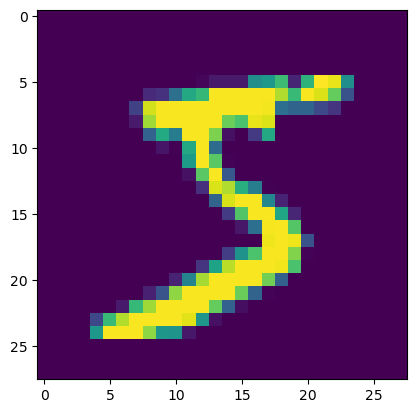

In [29]:
plt.imshow(single)

In [36]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
y_example = to_categorical(y_train)

In [34]:
y_example.shape

(60000, 10)

In [37]:
y_cat_test = to_categorical(y_test)

In [38]:
y_cat_train = to_categorical(y_train)

In [40]:
x_train = x_train/255

In [41]:
x_test = x_test/255

In [42]:
scaled_image = x_train[0]

In [43]:
scaled_image

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [44]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [45]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [46]:
from tensorflow.keras.models import Sequential

In [47]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [49]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size= (4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [75]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1043 - accuracy: 0.9681 - val_loss: 24.0879 - val_accuracy: 0.9501
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0987 - accuracy: 0.9699 - val_loss: 27.4901 - val_accuracy: 0.9463


In [76]:
historia = pd.DataFrame(model.history.history)

In [79]:
model.evaluate(x_test, y_cat_test, verbose=0)

[27.490127563476562, 0.9463000297546387]

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
predict = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [83]:
predictions = np.argmax(predict, axis=1)

In [84]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.93      0.99      0.96      1135
           2       0.95      0.97      0.96      1032
           3       0.92      0.97      0.94      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.91      0.94       892
           6       0.98      0.96      0.97       958
           7       0.89      0.97      0.93      1028
           8       0.96      0.87      0.91       974
           9       0.98      0.85      0.91      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [85]:
print(confusion_matrix(y_test, predictions))

[[ 974    0    0    3    1    0    1    0    1    0]
 [   0 1129    3    0    0    1    1    1    0    0]
 [   8    6 1000    4    1    0    2   10    1    0]
 [   0    5    5  976    1    4    0    9    7    3]
 [   0    7    5    0  942    1    6   12    3    6]
 [   9    3    2   35    3  813    8    8   11    0]
 [  10    8    7    2    2    6  919    1    2    1]
 [   1   10   10    1    0    1    0 1001    0    4]
 [  12   32   22   31    5    5    3   14  849    1]
 [   4   19    1   13   30    3    0   71    8  860]]


<AxesSubplot:>

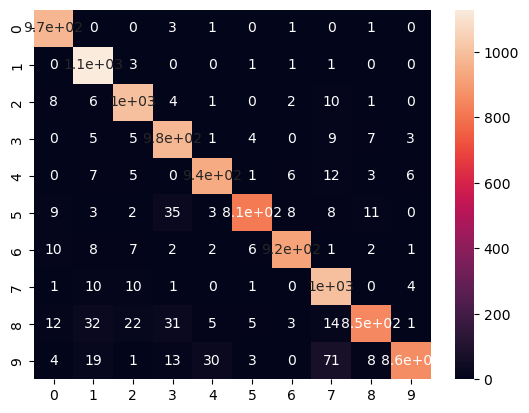

In [87]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [88]:
my_number = x_test[0]

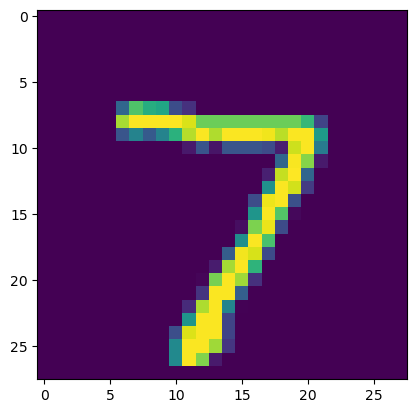

In [89]:
plt.imshow(my_number.reshape(28,28))

In [90]:
model.predict(my_number.reshape())

1/1 [==============================] - 0s 14ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)